In [17]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np


In [18]:
model = pybamm.BaseModel()
x = pybamm.Variable("x")
# t = pybamm.Variable("t") # pybamm.t is a built-in variable for time
i = pybamm.FunctionParameter(
    "i", {"t": pybamm.t}
)  # FunctionParameter("name", {dict of variables the function depends on})
model.rhs = {x: i}
model.initial_conditions = {x: 0}
model.variables = {"x": x, "i": i, "t": pybamm.t}


In [19]:
def current_function(t):
    return 2 * (t < 0.5) - 4 * (t >= 0.5)


parameter_values = pybamm.ParameterValues({"i": current_function})
parameter_values.process_model(model)
solver = pybamm.ScipySolver()
sol = solver.solve(model, np.linspace(0, 1, 500))


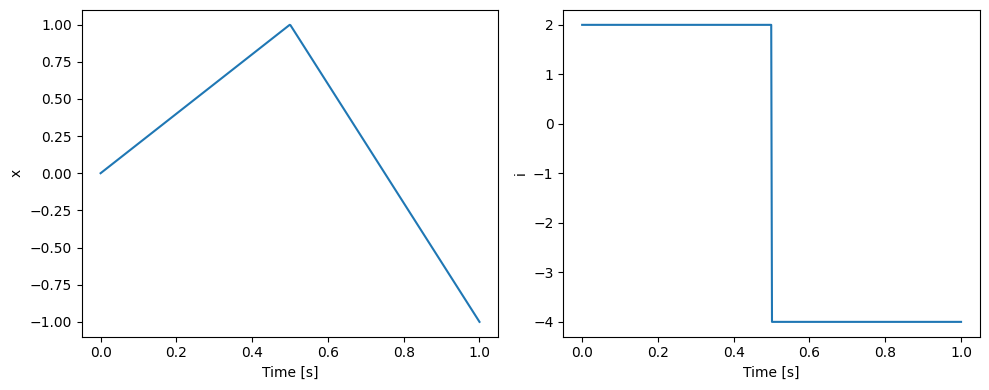

In [20]:
t_sol = sol["t"].data
x_sol = sol["x"].data
i_sol = sol["i"].data

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(t_sol, x_sol)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("x")
ax[1].plot(t_sol, i_sol)
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("i")
plt.tight_layout()
